##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Get started with image generation

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_imagen.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The Imagen 4 family of models are Google's highest quality text-to-image models, featuring a number of new and improved capabilities. Imagen 4 can do the following:

* Generate images with fine detail, rich lighting, and few distracting artifact
* Understand prompts written in natural language
* Generate images in a wide range of formats and styles
* Render text effectively

This notebook is using the [Python SDK](https://googleapis.github.io/python-genai/#imagen). For the REST API, check out the [Get Started with Imagen](../Get_started_imagen_rest.ipynb) guide.


<!-- Warning Badge -->
<table>
  <tr>
    <!-- Emoji -->
    <td bgcolor="#f5949e">
      <font size=30>⚠️</font>
    </td>
    <!-- Text Content Cell -->
    <td bgcolor="#f5949e">
      <h3><font color=black>Image generation is a paid-only feature and won't work if you are on the free tier. Check the <a href="https://ai.google.dev/pricing#imagen-4"><font color='#217bfe'>pricing</font></a> page for more details.</font></h3>
    </td>
  </tr>
</table>

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -q -U "google-genai>=1.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.9 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai

client = genai.Client(api_key=GOOGLE_API_KEY)

## Generate images


### Select model

You can choose from a range of available Imagen models:
* Imagen 4 (`imagen-4.0-generate-001`) is the new stadard model you should use to generate.
* Imagen 4 Ultra (`imagen-4.0-ultra-generate-001`) is the best Imagen model, generating even finer images and is especially good at generating images with text. Note that it can only generate one image at a time.
* Imagen 4 Fast (`imagen-4.0-fast-generate-001`) is a faster model and generates at a lower cost compared to Imagen 4 and Ultra. See the [pricing page](https://ai.google.dev/gemini-api/docs/pricing#imagen-4) for details.
* Imagen 3 (`imagen-3.0-generate-002`) is the previous generation model. It's still available in case you need to rerun old prompts, but it is recommended to use the 4th generation models now.

In [ ]:
MODEL_ID = "imagen-4.0-generate-001" # @param ["imagen-3.0-generate-002","imagen-4.0-generate-001","imagen-4.0-ultra-generate-001", "imagen-4.0-fast-generate-001"] {"allow-input":true}


### Prompt creation

Now, write your prompt and set some optional parameters. The `imagen-4.0-generate-001` model is trained on long captions and will provide better results for longer and more descriptive prompts. Note that if you use a short prompt, it may result in low adherence and more random output.

Check the [prompt guide](https://ai.google.dev/gemini-api/docs/imagen-prompt-guide) for more advice on creating your prompts.

Here are the parameters you can set relating to your prompt:
* `number_of_images`: Specifies how many iamges will be generated. The default value is 4, with valid values between 1 to 4, inclusive. In the below code cell, `sample_count` is used to define this.
* `person_generation`: Allows the model to generate images with adults. Kids are always blocked. The supported values are `DONT_ALLOW` and `ALLOW_ADULT`. The default value is `ALLOW_ADULT`.
* `aspect_ratio`: Specifies the aspect ratio of the images produces. The supported values are `1:1`, `3:4`, `4:3`, `16:9`, and `9:16`. The default value is `1:1`.
* `image_size`: The output resolution of the image, either `1k` (default) or `2k`, for supported models.
* `output_mime_type`: The output type of your image, which will be `image/jpeg`. This is the only allowed value at the moment.

A non-visible digital [SynthID](https://deepmind.google/technologies/synthid/) watermark is always added to generated images.


In [ ]:
prompt = "A cat lounging lazily on a sunny windowstill playing with a kid toy." # @param {type:"string"}
number_of_images = 1 # @param {type:"slider", min:1, max:4, step:1}
person_generation = "ALLOW_ADULT" # @param ['DONT_ALLOW', 'ALLOW_ADULT']
aspect_ratio = "1:1" # @param ["1:1", "3:4", "4:3", "16:9", "9:16"],
image_size = "1k" # @param ["1k", "2k"]

### Generate the images

In [ ]:
result = client.models.generate_images(
    model=MODEL_ID,
    prompt=prompt,
    config=dict(
        number_of_images=number_of_images,
        output_mime_type="image/jpeg",
        person_generation=person_generation,
        aspect_ratio=aspect_ratio,
        image_size=image_size,
    )
)

### Display the images

Use the code below to inspect the images you generated.

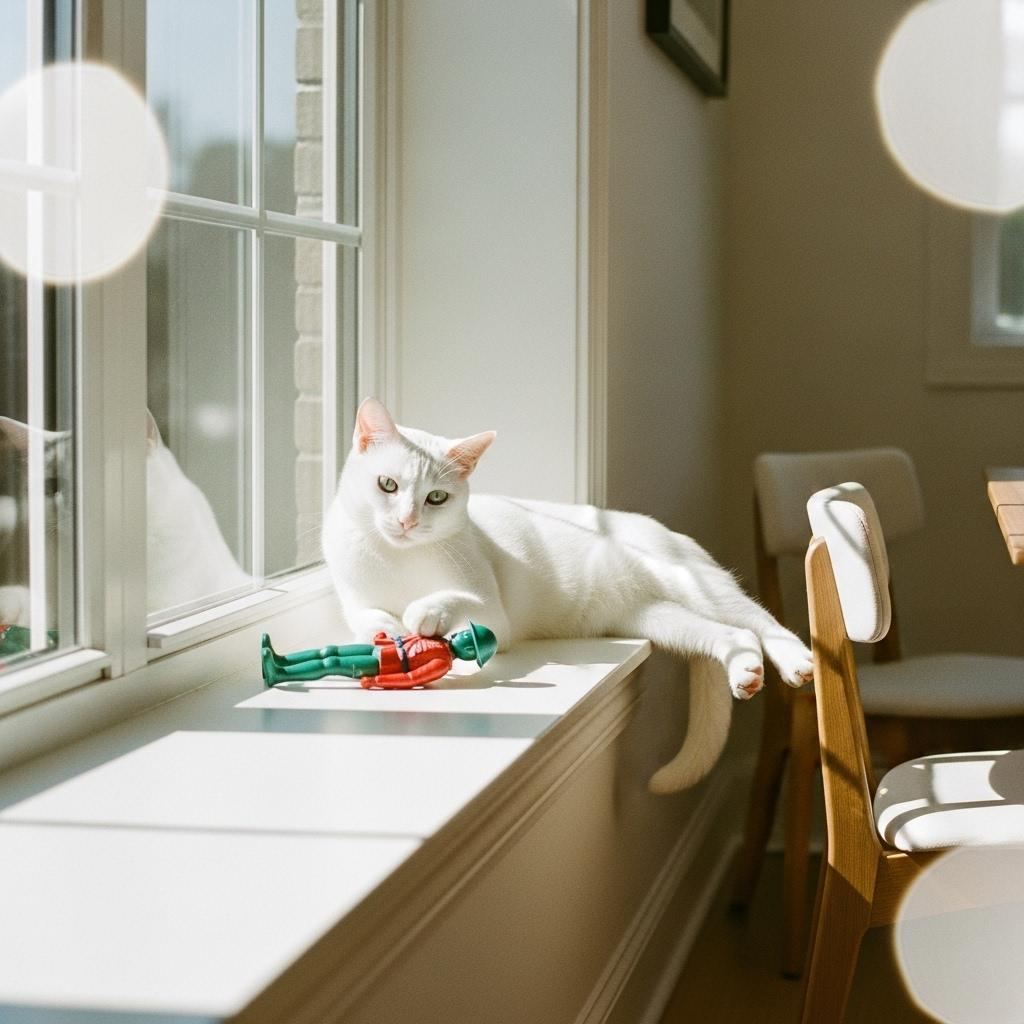

In [ ]:
for generated_image in result.generated_images:
  (image := generated_image.image).show()

# Outside of Colab, you'll need to use those libraries to open the images
# from PIL import Image
# from io import BytesIO
# for generated_image in result.generated_images:
#   image = Image.open(BytesIO(generated_image.image.image_bytes))

## Generate images with text

Imagen 3 and 4 models are good at generating images with text. Here's an example with a comic strip:

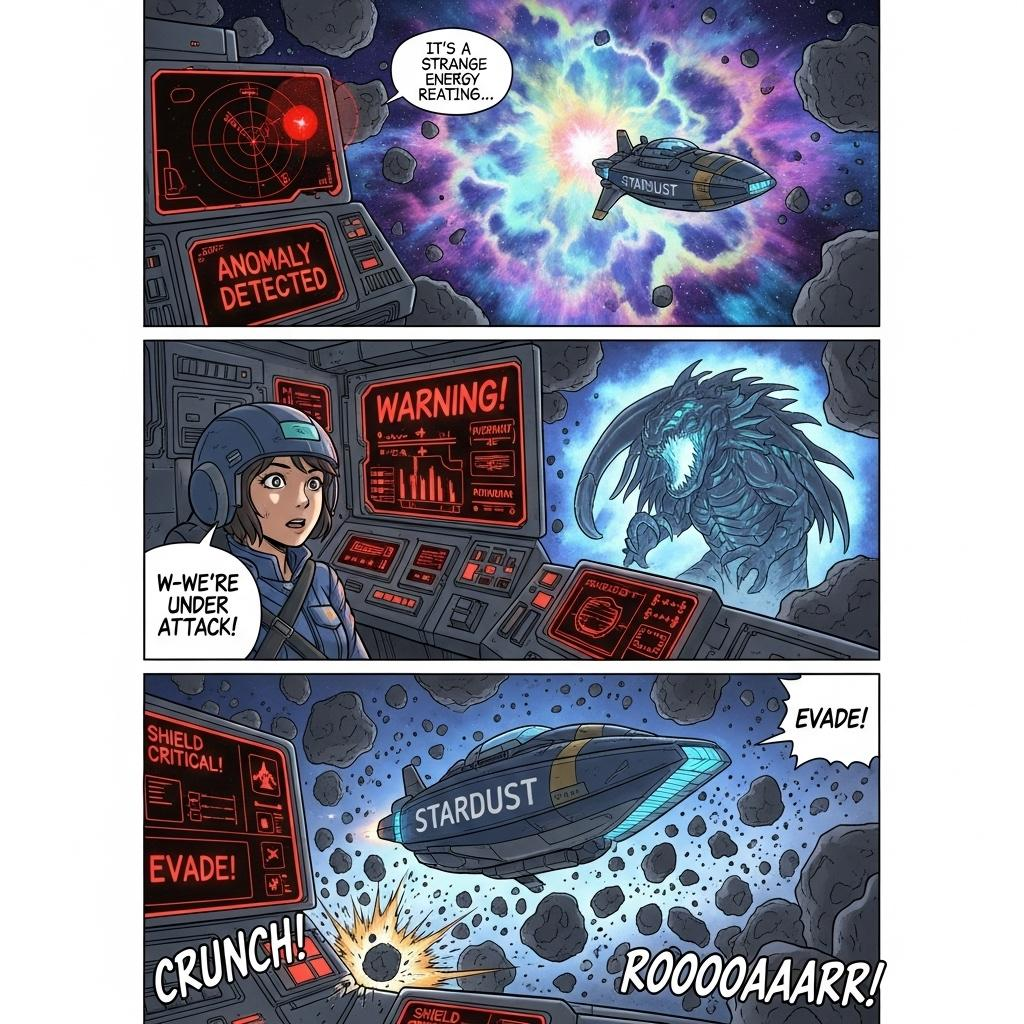

In [ ]:
prompt = "A 3-panel cosmic epic comic. Panel 1: Tiny 'Stardust' in nebula; radar shows anomaly (text 'ANOMALY DETECTED'), hull text 'stardust'. Pilot whispers. Panel 2: Bioluminescent leviathan emerges; console red text 'WARNING!. Panel 3: Leviathan chases ship through asteroids; console re text 'SHIELD CRITICAL!', screen text 'EVADE!'. Pilot screams, SFX 'CRUNCH!', 'ROOOOAAARR!'." # @param {type:"string"}
number_of_images = 1 # @param {type:"slider", min:1, max:4, step:1}
person_generation = "ALLOW_ADULT" # @param ['DONT_ALLOW', 'ALLOW_ADULT']
aspect_ratio = "1:1" # @param ["1:1", "3:4", "4:3", "16:9", "9:16"]

result = client.models.generate_images(
    model=MODEL_ID,
    prompt=prompt,
    config=dict(
        number_of_images=number_of_images,
        output_mime_type="image/jpeg",
        person_generation=person_generation,
        aspect_ratio=aspect_ratio
    )
)

for generated_image in result.generated_images:
  (image := generated_image.image).show()

Here's a second one. This time, the image saved in the notebook has been generated using Imagen 4 Ultra as there was quite a lot of text to process:

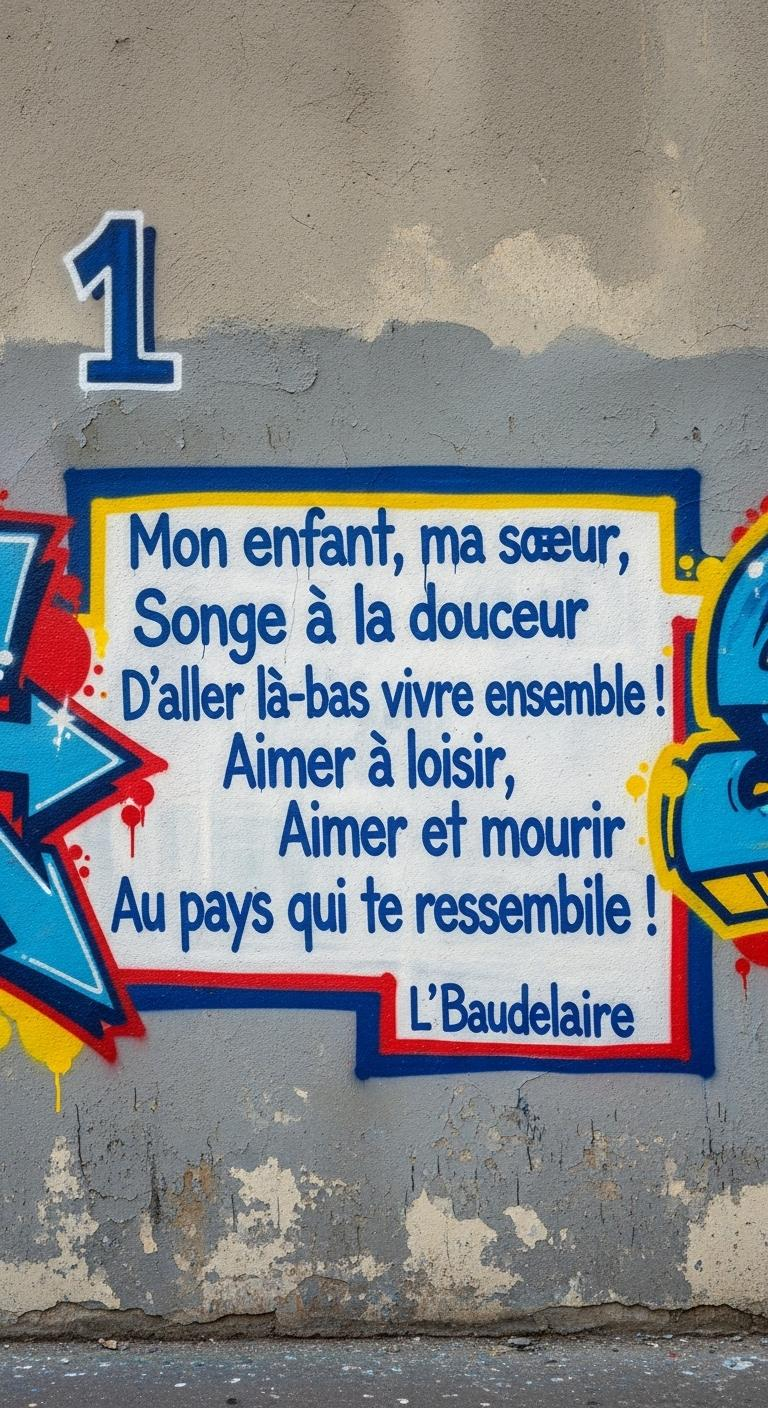

In [ ]:
prompt = "a wall on which a colorful tag is drawn and that cab be read as the first verse of Charles Baudelaire's poem \"l'invitation au voyage\": Mon enfant, ma sœur,    Songe à la douceur  D’aller là-bas vivre ensemble !    Aimer à loisir,    Aimer et mourir  Au pays qui te ressemble !" # @param {type:"string"}
number_of_images = 1 # @param {type:"slider", min:1, max:4, step:1}
person_generation = "ALLOW_ADULT" # @param ['DONT_ALLOW', 'ALLOW_ADULT']
aspect_ratio = "9:16" # @param ["1:1", "3:4", "4:3", "16:9", "9:16"]

result = client.models.generate_images(
    model=MODEL_ID,
    prompt=prompt,
    config=dict(
        number_of_images=number_of_images,
        output_mime_type="image/jpeg",
        person_generation=person_generation,
        aspect_ratio=aspect_ratio
    )
)

for generated_image in result.generated_images:
  (image := generated_image.image).show()

## Next Steps
### Useful documentation references:

To improve your prompting skills, check the [prompt guide](https://ai.google.dev/gemini-api/docs/imagen-prompt-guide) for great advices on creating your prompts.

### Check those cool Imagen examples:
Here are some Imagen examples to get your imagination started on how to use it in creative ways:
*  [Illustrate a book](../examples/Book_illustration.ipynb): Use Gemini and Imagen to create illustration for an open-source book

### Continue your discovery of the Gemini API

Gemini is not only good at generating images, but also at understanding them. Check the [Spatial understanding](./Spatial_understanding.ipynb) guide for an introduction on those capabilities, and the [Video understanding](./Video_understanding.ipynb) one for video examples.
